In [1]:
import tensorflow as tf

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
import keras

from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras import regularizers

import sklearn
from sklearn import preprocessing, datasets, metrics
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
#display top 5 rows of the csv file
heart_data = pd.read_csv("heart.csv")
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
#checking for any null values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
#Checking whether data is balanced
heart_data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

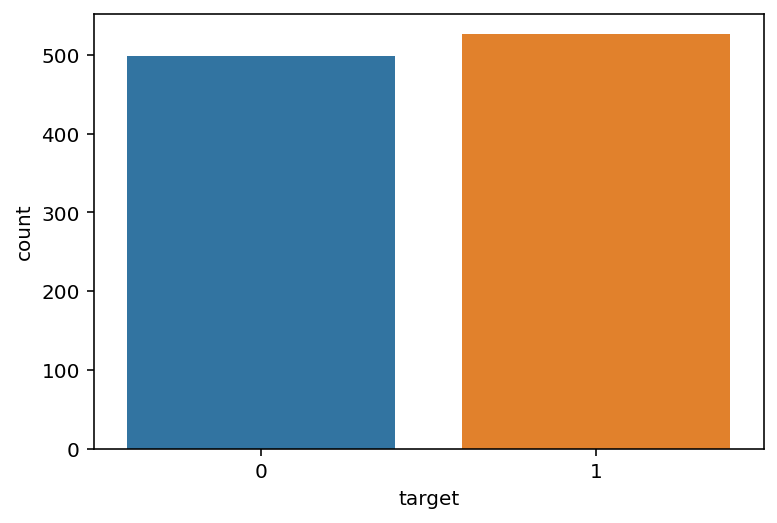

In [5]:
#Data is pretty balanced
sns.countplot(heart_data['target'], label='count')

In [6]:
#Checking datatypes - any non-numerical data must be encoded
heart_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

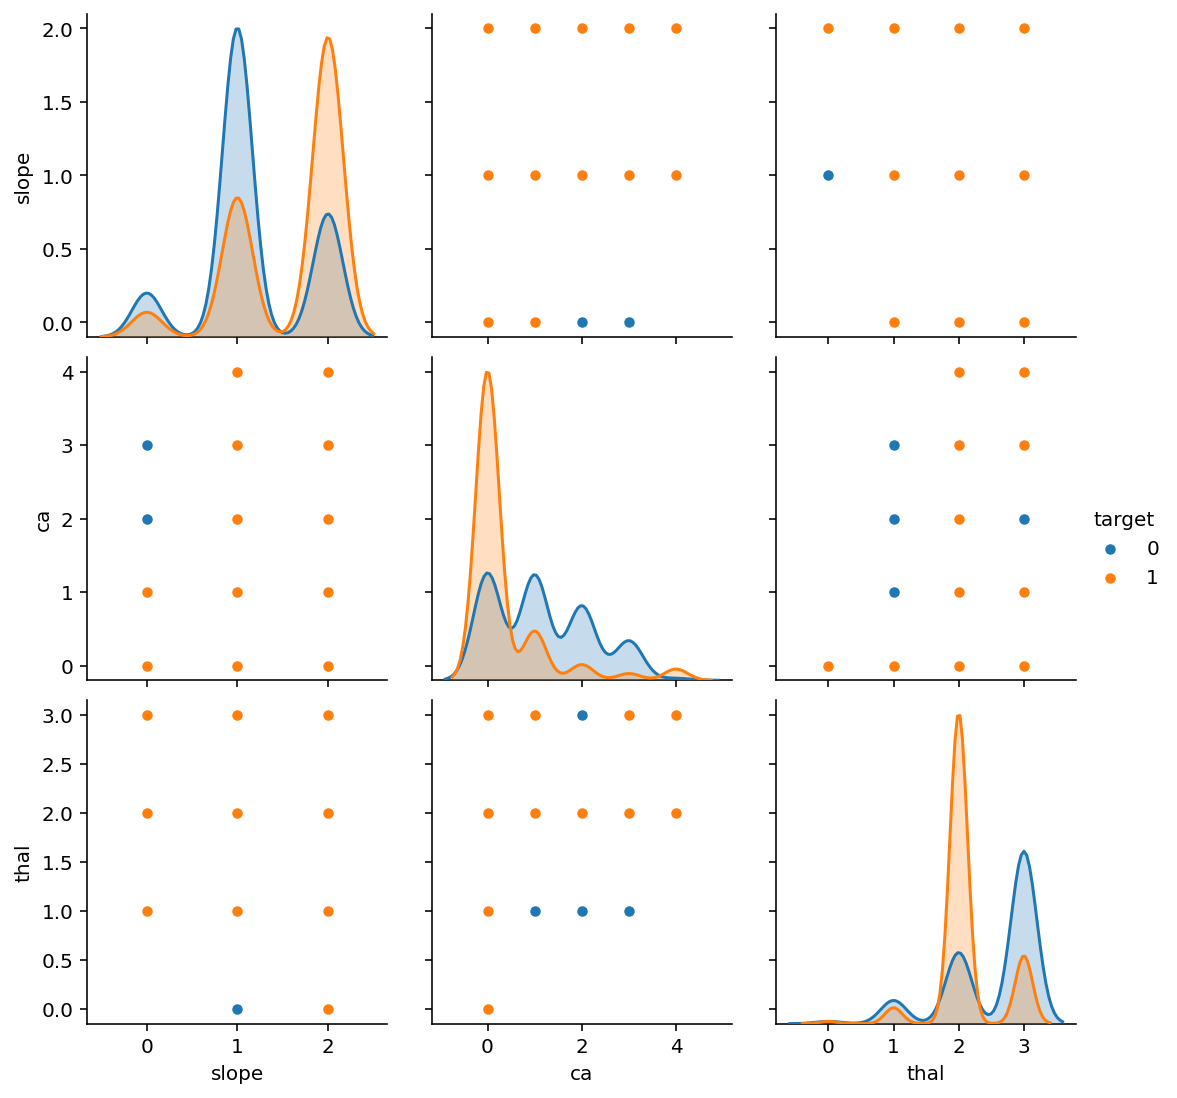

In [7]:
sns.pairplot(heart_data.iloc[:, -4:], hue='target')

In [8]:
#Checking correlation between columns
heart_data.iloc[:,0:].corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


<AxesSubplot:>

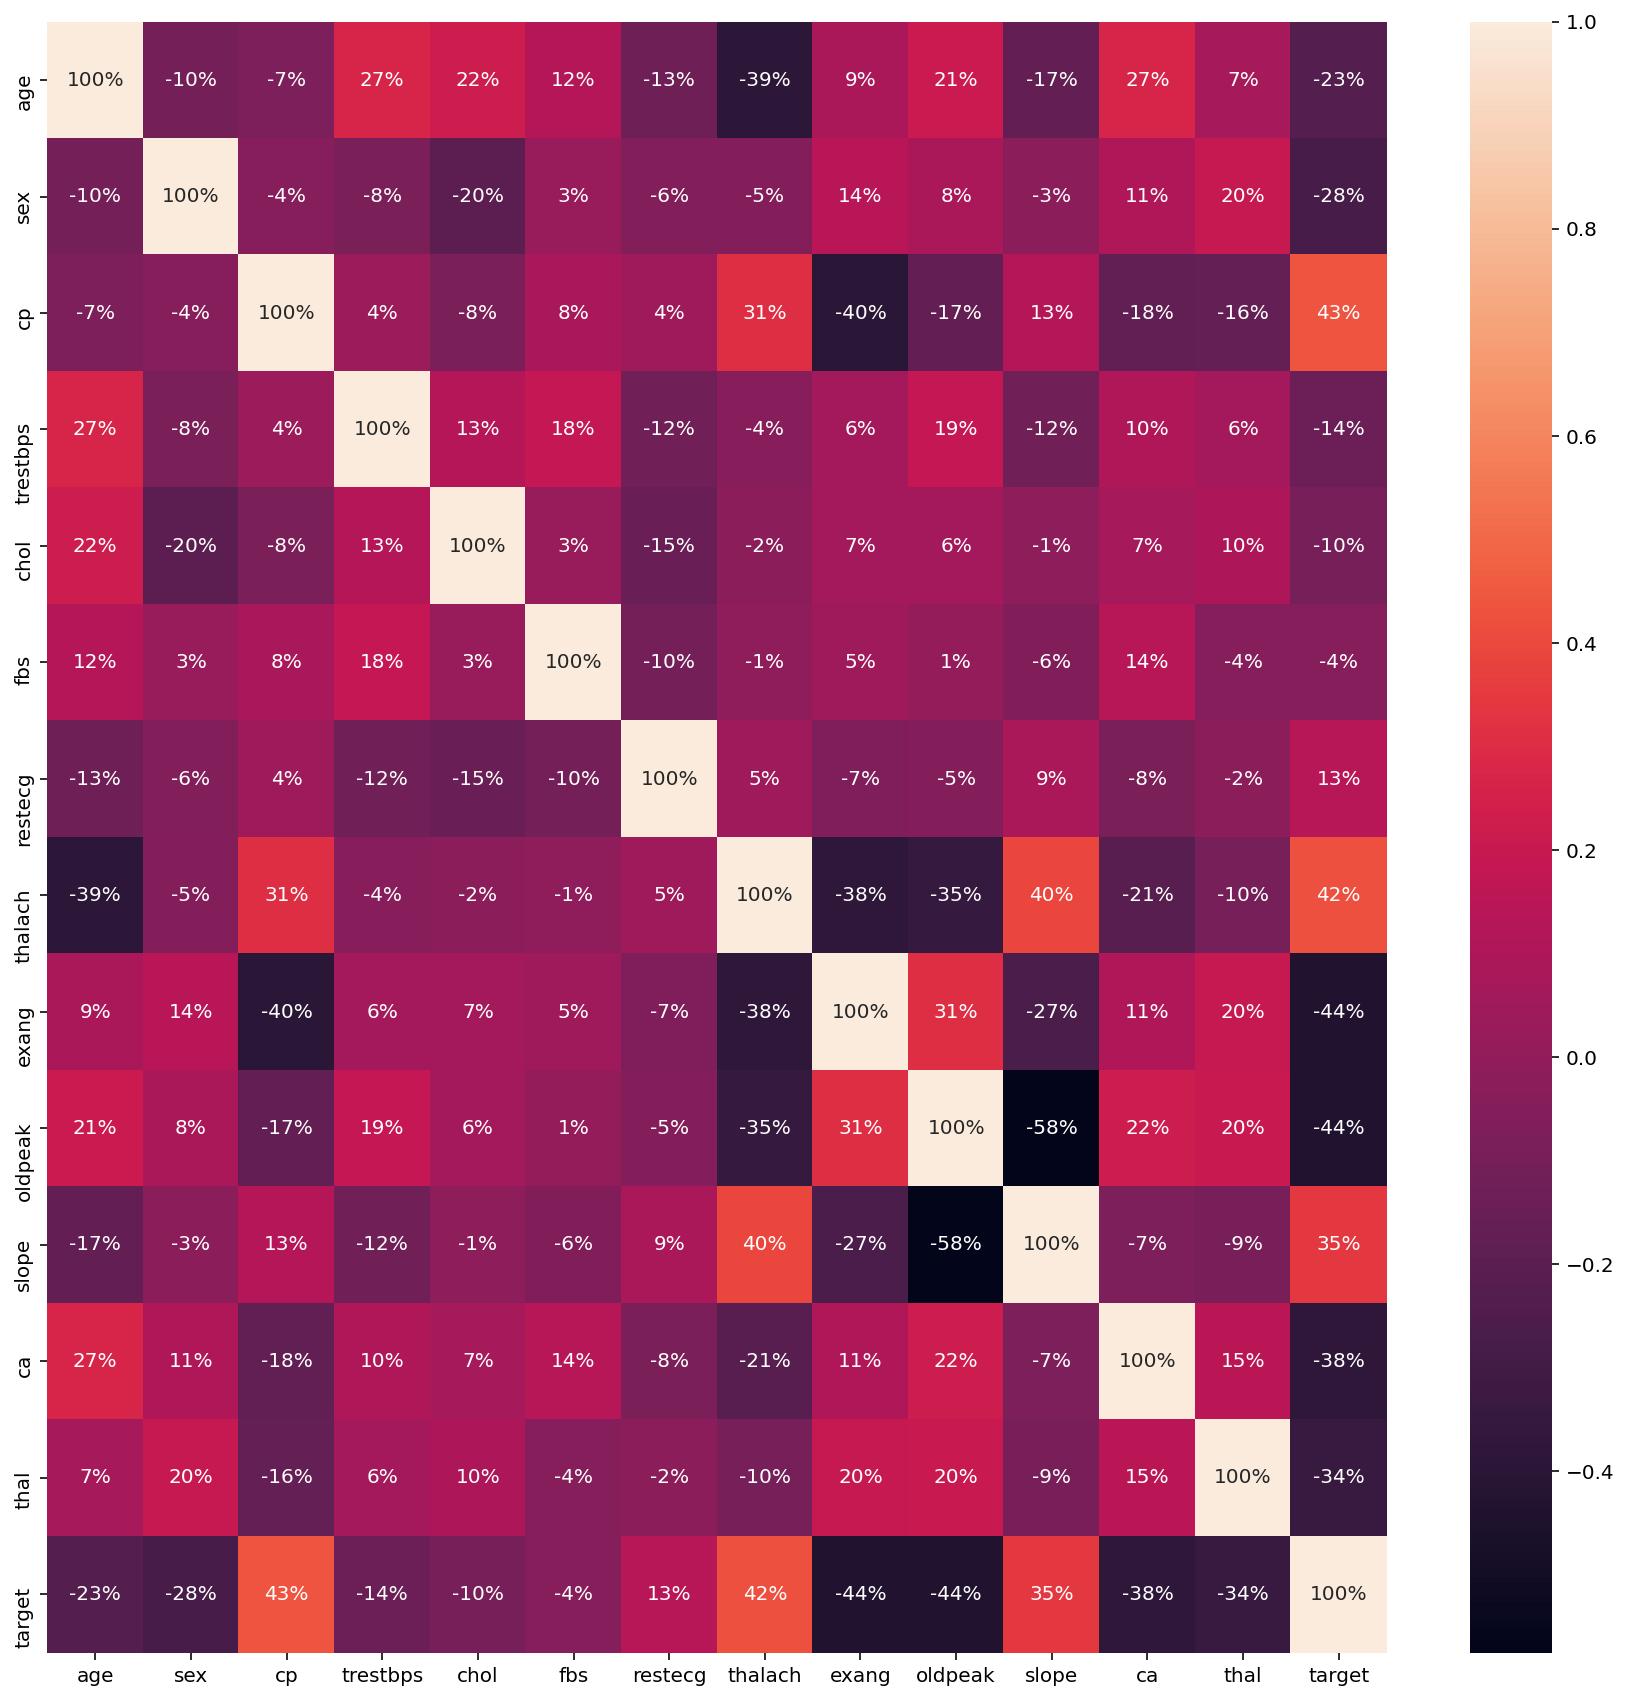

In [9]:
#heatmap that visualizes the correlation
plt.figure(figsize=(15, 15))
sns.heatmap(heart_data.iloc[:, 0:].corr(), annot=True, fmt='.0%')

In [11]:
#splitting the csv data into inputs and labels
X = heart_data.iloc[:,0:-1]
y = heart_data.iloc[:,-1]
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [12]:
X = X.values
y = y.values

In [13]:
#split data into 75%, 25% train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [14]:
#scale data to bring all values to same range
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

X_train

array([[ 1.3756016 ,  0.64371161, -0.92094523, ..., -0.66196846,
         2.16167937, -0.52198613],
       [-0.50461767,  0.64371161, -0.92094523, ..., -0.66196846,
        -0.73565005,  1.09448705],
       [ 1.15439933,  0.64371161,  1.98570929, ..., -0.66196846,
         0.23012642, -0.52198613],
       ...,
       [ 1.15439933,  0.64371161,  1.98570929, ..., -0.66196846,
         0.23012642, -0.52198613],
       [ 1.3756016 ,  0.64371161, -0.92094523, ..., -0.66196846,
        -0.73565005, -0.52198613],
       [ 0.60139366,  0.64371161,  1.01682445, ..., -0.66196846,
        -0.73565005, -0.52198613]])

In [15]:
def model(X_train, y_train):
    #Logistic Regression
    from sklearn.linear_model import LogisticRegression
    logistic_reg = LogisticRegression(random_state = 0)
    logistic_reg.fit(X_train, y_train)
    
    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    decision_tree = DecisionTreeClassifier(criterion='entropy', random_state = 0)
    decision_tree.fit(X_train, y_train)
    
    #Support Vector Machines
    from sklearn import svm
    support_vm = svm.SVC(kernel='linear', C=1)
    support_vm.fit(X_train, y_train)
    
    #Random Forest
    from sklearn.ensemble import RandomForestClassifier
    random_for = RandomForestClassifier(n_estimators = 10, criterion='entropy', random_state = 0)
    random_for.fit(X_train, y_train)
    
    #Print model accuracy for the training data
    print("Logistic Regression Training Accuracy:", logistic_reg.score(X_train, y_train))
    print("Decision Tree Training Accuracy:", decision_tree.score(X_train, y_train))
    print("SVM Training Accuracy:", support_vm.score(X_train, y_train))
    print("Random Forest Training Accuracy:", random_for.score(X_train, y_train))
    
    return logistic_reg, decision_tree, support_vm, random_for

In [16]:
#getting all of the models
all_models = model(X_train, y_train)

Logistic Regression Training Accuracy: 0.8541666666666666
Decision Tree Training Accuracy: 1.0
SVM Training Accuracy: 0.8463541666666666
Random Forest Training Accuracy: 1.0


In [17]:
#Test data on the confusion matrix
#Combines the Sensitivity, Specificity and the Positive/ Negative Predicted Value(PPV/ NPV)
from sklearn.metrics import confusion_matrix

models = ["Logistic Regression", "Decision Tree", "SVM", "Random Forest"]

for i in range(len(all_models)):
    print("Model:", models[i])
    model_cm = confusion_matrix(y_test, all_models[i].predict(X_test))
    
    model_TP = model_cm[0][0]
    model_TN = model_cm[1][1]
    model_FN = model_cm[1][0]
    model_FP = model_cm[0][1]
    
    print(model_cm)
    print("Testing Accuracy:", (model_TP + model_TN) / (model_TP + model_TN + model_FP + model_FN))
    print("Sensitivity:", (model_TP) / (model_TP + model_FN))
    print("Specificity:", (model_TN) / (model_TN + model_FP))
    print()

Model: Logistic Regression
[[ 97  26]
 [  9 125]]
Testing Accuracy: 0.8638132295719845
Sensitivity: 0.9150943396226415
Specificity: 0.8278145695364238

Model: Decision Tree
[[116   7]
 [  4 130]]
Testing Accuracy: 0.9571984435797666
Sensitivity: 0.9666666666666667
Specificity: 0.948905109489051

Model: SVM
[[ 96  27]
 [  9 125]]
Testing Accuracy: 0.8599221789883269
Sensitivity: 0.9142857142857143
Specificity: 0.8223684210526315

Model: Random Forest
[[123   0]
 [  0 134]]
Testing Accuracy: 1.0
Sensitivity: 1.0
Specificity: 1.0



In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(all_models)):
    print("Model:", models[i])
    print(classification_report(y_test, all_models[i].predict(X_test)))
    print(accuracy_score(y_test, all_models[i].predict(X_test)))
    print()

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       123
           1       0.83      0.93      0.88       134

    accuracy                           0.86       257
   macro avg       0.87      0.86      0.86       257
weighted avg       0.87      0.86      0.86       257

0.8638132295719845

Model: Decision Tree
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       123
           1       0.95      0.97      0.96       134

    accuracy                           0.96       257
   macro avg       0.96      0.96      0.96       257
weighted avg       0.96      0.96      0.96       257

0.9571984435797666

Model: SVM
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       123
           1       0.82      0.93      0.87       134

    accuracy                           0.86       257
   macro avg       0.87      

In [19]:
#print predictions of the best classifier - random forest | decision tree as well
#however since random forest is an average of decision trees its better to pick
#randmom forests
predictions = all_models[-1].predict(X_test)
print(predictions)
print()
print(y_test)

[1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0
 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0
 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1
 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1
 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1
 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1
 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1]

[1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0
 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0
 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1
 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1
 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1
 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1
 1 0 1 0 0 1 1 0 0 1 1 0 1 

In [20]:
import pickle
with open("Best-Model-Random-Forest.pickle", "wb") as f:
    pickle.dump(all_models[-1], f)